# Narrative

The purpose of this experiment is to figure out what angle gives the maximum range for a baseball using only backspin. There will be factors that will change the range of the baseball significantly. The possible factors are: The speed the ball is going, the angular speed the ball has, the density of air, and countless others. The conditions that matter the most for this project are how fast the ball is going, the angle the ball is hit, and spinrate the ball has. Most importantly is the angle the ball is getting hit. The magnus effect describes the force on a rotating ball by the air, due to the spin of the ball and its motion through the air. A ball with backspin gets lift, a ball with topspin dives, a ball with side spin curves left or right. The basic equation of the magnus effect is: $$\vec{F}_{magnus} = \alpha \vec{\omega} \times \vec{v}$$. The x in the equation reperesents the cross product of the two values. 

The full equation incorparates the spin rate S, the coeficcient of lift Cl, the cross sectional area A, r the radius,  and the variable $\rho$ (rho).

The full equation looks likee this:

$$\vec{F}_{magnus} = \frac{1}{2}C_L \frac{\rho A r}{S} \vec{\omega} \times \vec{v}$$

## The sweet spot

When hitting a baseball there is an angle range that almost guarentees farther ball distance. According from source stratcast 101 the swweet spot for hitting is around 15- 35 degrees. They say that if a batter hits the ball inbetween those angles (also known as the barrel zone) then the batter will have a higher hit and distance percentage. 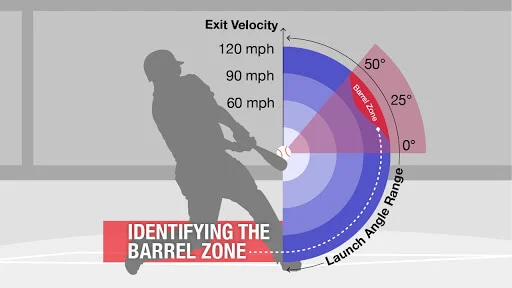


## Implementing the Code

By using the momentum principle which is $fnet = \frac{\Delta P}{\Delta t}$, the magnus effect, and the sweet spot we can find both the phyiscs and the threshold that are ball has to be. The code is going to be broken into two parts. The first part being a hardcoded max distance and angle. I did this so that I can validate the custom ball speed and spinrate. The second part is going to be user inputted so that any value for speed and spinrate will return the best angle. This also gets help from the first part of the code as a way to validate the user inputed one. 


In [17]:
import ode #ode.py should be in the same folder as your notebook
import numpy as np
import matplotlib.pyplot as plt

# Initial Conditions

This code segment sets up the initial conditions. The variable thetadeg will be changing as we find the best value for the angle. The intial positions will later be returned when the function magnus gets called.

In [31]:
# data for home run
vmag0mph = 111.1 #mph
thetadeg = 25 #deg
spinrate = 1838 #rpm

# convert units and create initial conditions
vmag0 = vmag0mph*0.44704 #convert mph to m/s
theta = thetadeg*np.pi/180 #convert deg to rad

# initial position and velocity components
x = 0
y = 0
z = 0
vx = vmag0*np.cos(theta)
vy = vmag0*np.sin(theta)
vz = 0

# initial angular speed and velocity
omegamag = spinrate * 2*np.pi / 60 #convert to rad/s
omegax = 0
omegay = 0
omegaz = omegamag

# Constants

In [25]:
#parameters
g = 9.8 #N/kg
rho = 1.2 #kg/m^3
mu = 1.8e-5 #kg/m/s
r = 74e-3/2 #74 mm diameter, 9.25" in circumference
A = np.pi*r**2 #cross-sectional area
Cd = 0.5 #actually depends on speed
m = 0.145 #kg
b2 = 1/2*Cd*rho*A #will change as Cd changes

S = 0.01 #will change as omega and v change
CL = 0 #will change with S
alpha = 1/2*CL*rho*A*r/S


# Setting up Forces

This function get the data from the data from the user and the asigns each index of the data list to the returned values x,y,z,vx,vy,vz. Using these valus I can get the derivativs for the velocity. From there I calculate the drag force, gravity, and the magnus effect so that I can calculate fnet for the ball. 

In [26]:
def magnus(d, t):
    """ Calculate and return the derivative of each quantity in an array d at the time t.
    
    Keyword arguments:
    t -- time at the beginning of the time step
    d -- an array of variables at time t
    """
    
    x = d[0]
    y = d[1]
    z = d[2]
    vx = d[3]
    vy = d[4]
    vz = d[5]
    
    dxdt = vx
    dydt = vy
    dzdt = vz
    
    v = np.sqrt(vx**2 + vy**2 + vz**2)
    
    #drag
    a = 0.36
    b = 0.14
    c = 0.27
    vc = 34
    chi = (v-vc)/4
    
    if chi < 0:
        Cd = a + b/(1+np.exp(chi)) - c*np.exp(-chi**2)
    else:
        Cd = a + b/(1+np.exp(chi)) - c*np.exp(-chi**2/4)
    
    b2 = 1/2*Cd*rho*A
    Fdragx = -b2*v**2*vx/v
    Fdragy = -b2*v**2*vy/v
    Fdragz = -b2*v**2*vz/v
    
    #magnus
    S = r*omegamag/v
    CL = 0.62*S**0.7
    alpha = 1/2*CL*rho*A*r/S
    Fmagnusx = alpha*(omegay*vz - omegaz*vy)
    Fmagnusy = alpha*(omegaz*vx - omegax*vz)
    Fmagnusz = alpha*(omegax*vy - omegay*vx)
    
    #grav
    Fgravy = -m*g
    
    #Fnet
    Fnetx = Fdragx + Fmagnusx
    Fnety = Fdragy + Fmagnusy + Fgravy
    Fnetz = Fdragz + Fmagnusz
    
    #derivative of velocity
    dvxdt = Fnetx/m
    dvydt = Fnety/m
    dvzdt = Fnetz/m
    
    derivs = np.array([dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt])
    
    return derivs

# largest value 

In [29]:

t = 0
h = 0.01

# array for instantaneous position and velocity data
data = np.array([x, y, z, vx, vy, vz])


# lists for storing data to graph
tlist = []
xlist = []
ylist = []
zlist = []

# store initial values
tlist.append(t)
xlist.append(x)
ylist.append(y)
zlist.append(z)

while y >= 0:
    
    data = ode.RK4(magnus, data, t, h)
    t = t + h
    
    x = data[0]
    y = data[1]
    z = data[2]
    tlist.append(t)
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)
    


In [30]:
xmax = xlist[-1]
print("max x in m = ", xmax)

xmax_ft = xmax*3.28084
print("max x in ft = ", xmax_ft)



max x in m =  142.85872365782484
max x in ft =  468.69661492553803


# User inputted info

In this code segment I will loop through the parameters of the sweet spot and then continue creating and clearing the lists: t,x,y,and z. The reason why these will be cleared is that the previous data would be interfering with the new calculations. If the distance traveled is greater than the previous distance, then the angle will be equaled to the next angle with the larger distance. If the distance is greater th

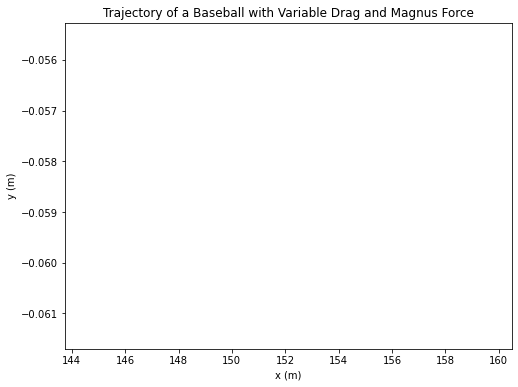

max x in m =  152.1215897175049
max x in ft =  499.08659640877875
best angle =  16


In [34]:
angle = 15

data = np.array([x, y, z, vx, vy, vz])
placeholder = 0
dist = 0

for i in range(16,36):
    tlist = []
    xlist = []
    ylist = []
    zlist = []
    thetadeg = i

# store initial values
    tlist.append(t)
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)
    
    while y >= 0:
    
        data = ode.RK4(magnus, data, t, h)
        t = t + h
    
        x = data[0]
        y = data[1]
        z = data[2]
        tlist.append(t)
        xlist.append(x)
        ylist.append(y)
        zlist.append(z)
    
    if dist < xlist[-1]:
        dist = xlist[-1]
        placeholder = i
        tlist.clear()
        xlist.clear()
        ylist.clear()
        zlist.clear()
    elif dist > xlist[-1]:
        break
        

plt.figure(figsize = (8,6))
plt.title("Trajectory of a Baseball with Variable Drag and Magnus Force")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.plot(xlist, ylist)
plt.show()
        
    
xma = xlist[-1]
print("max x in m = ", xmax)

xmax_ft = xmax*3.28084
print("max x in ft = ", xmax_ft)

print("best angle = ", placeholder)
        
        
    
    
    
    

# Sources

Information of forces like drag, magnus effect, and the momentum principle were given to me by Dr. Titus.

Information on the sweet spot and images used in this project are from the website: [click this link](https://www.fantraxhq.com/statcast-101-barrel-rates-launch-angle/)